In [442]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [443]:
df=pd.read_csv('census_income.csv')

In [444]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [445]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [446]:
df.shape

(32561, 15)

In [447]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   gender          32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income_bracket  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [449]:
df_cor=df.corr()

In [450]:
df_cor

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


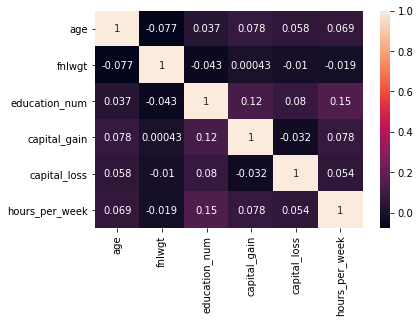

In [451]:
sns.heatmap(df_cor,annot=True)

In [452]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [453]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
gender                2
capital_gain        119
capital_loss         92
hours_per_week       94
native_country       42
income_bracket        2
dtype: int64

In [454]:
def label_fix(label):
    if label==' <=50K':
        return 0
    else:
        return 1

In [455]:
df['income_bracket'] = df['income_bracket'].apply(label_fix)

In [456]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [457]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [458]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
gender            object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income_bracket     int64
dtype: object

In [459]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'gender',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income_bracket'],
      dtype='object')

In [460]:
df.skew()

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
income_bracket     1.212430
dtype: float64

In [461]:
skew=('capital_gain','capital_loss')
for col in skew :
     if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [462]:
df.skew()

age               0.558743
fnlwgt            1.446980
education_num    -0.311676
capital_gain      3.096144
capital_loss      4.307537
hours_per_week    0.227643
income_bracket    1.212430
dtype: float64

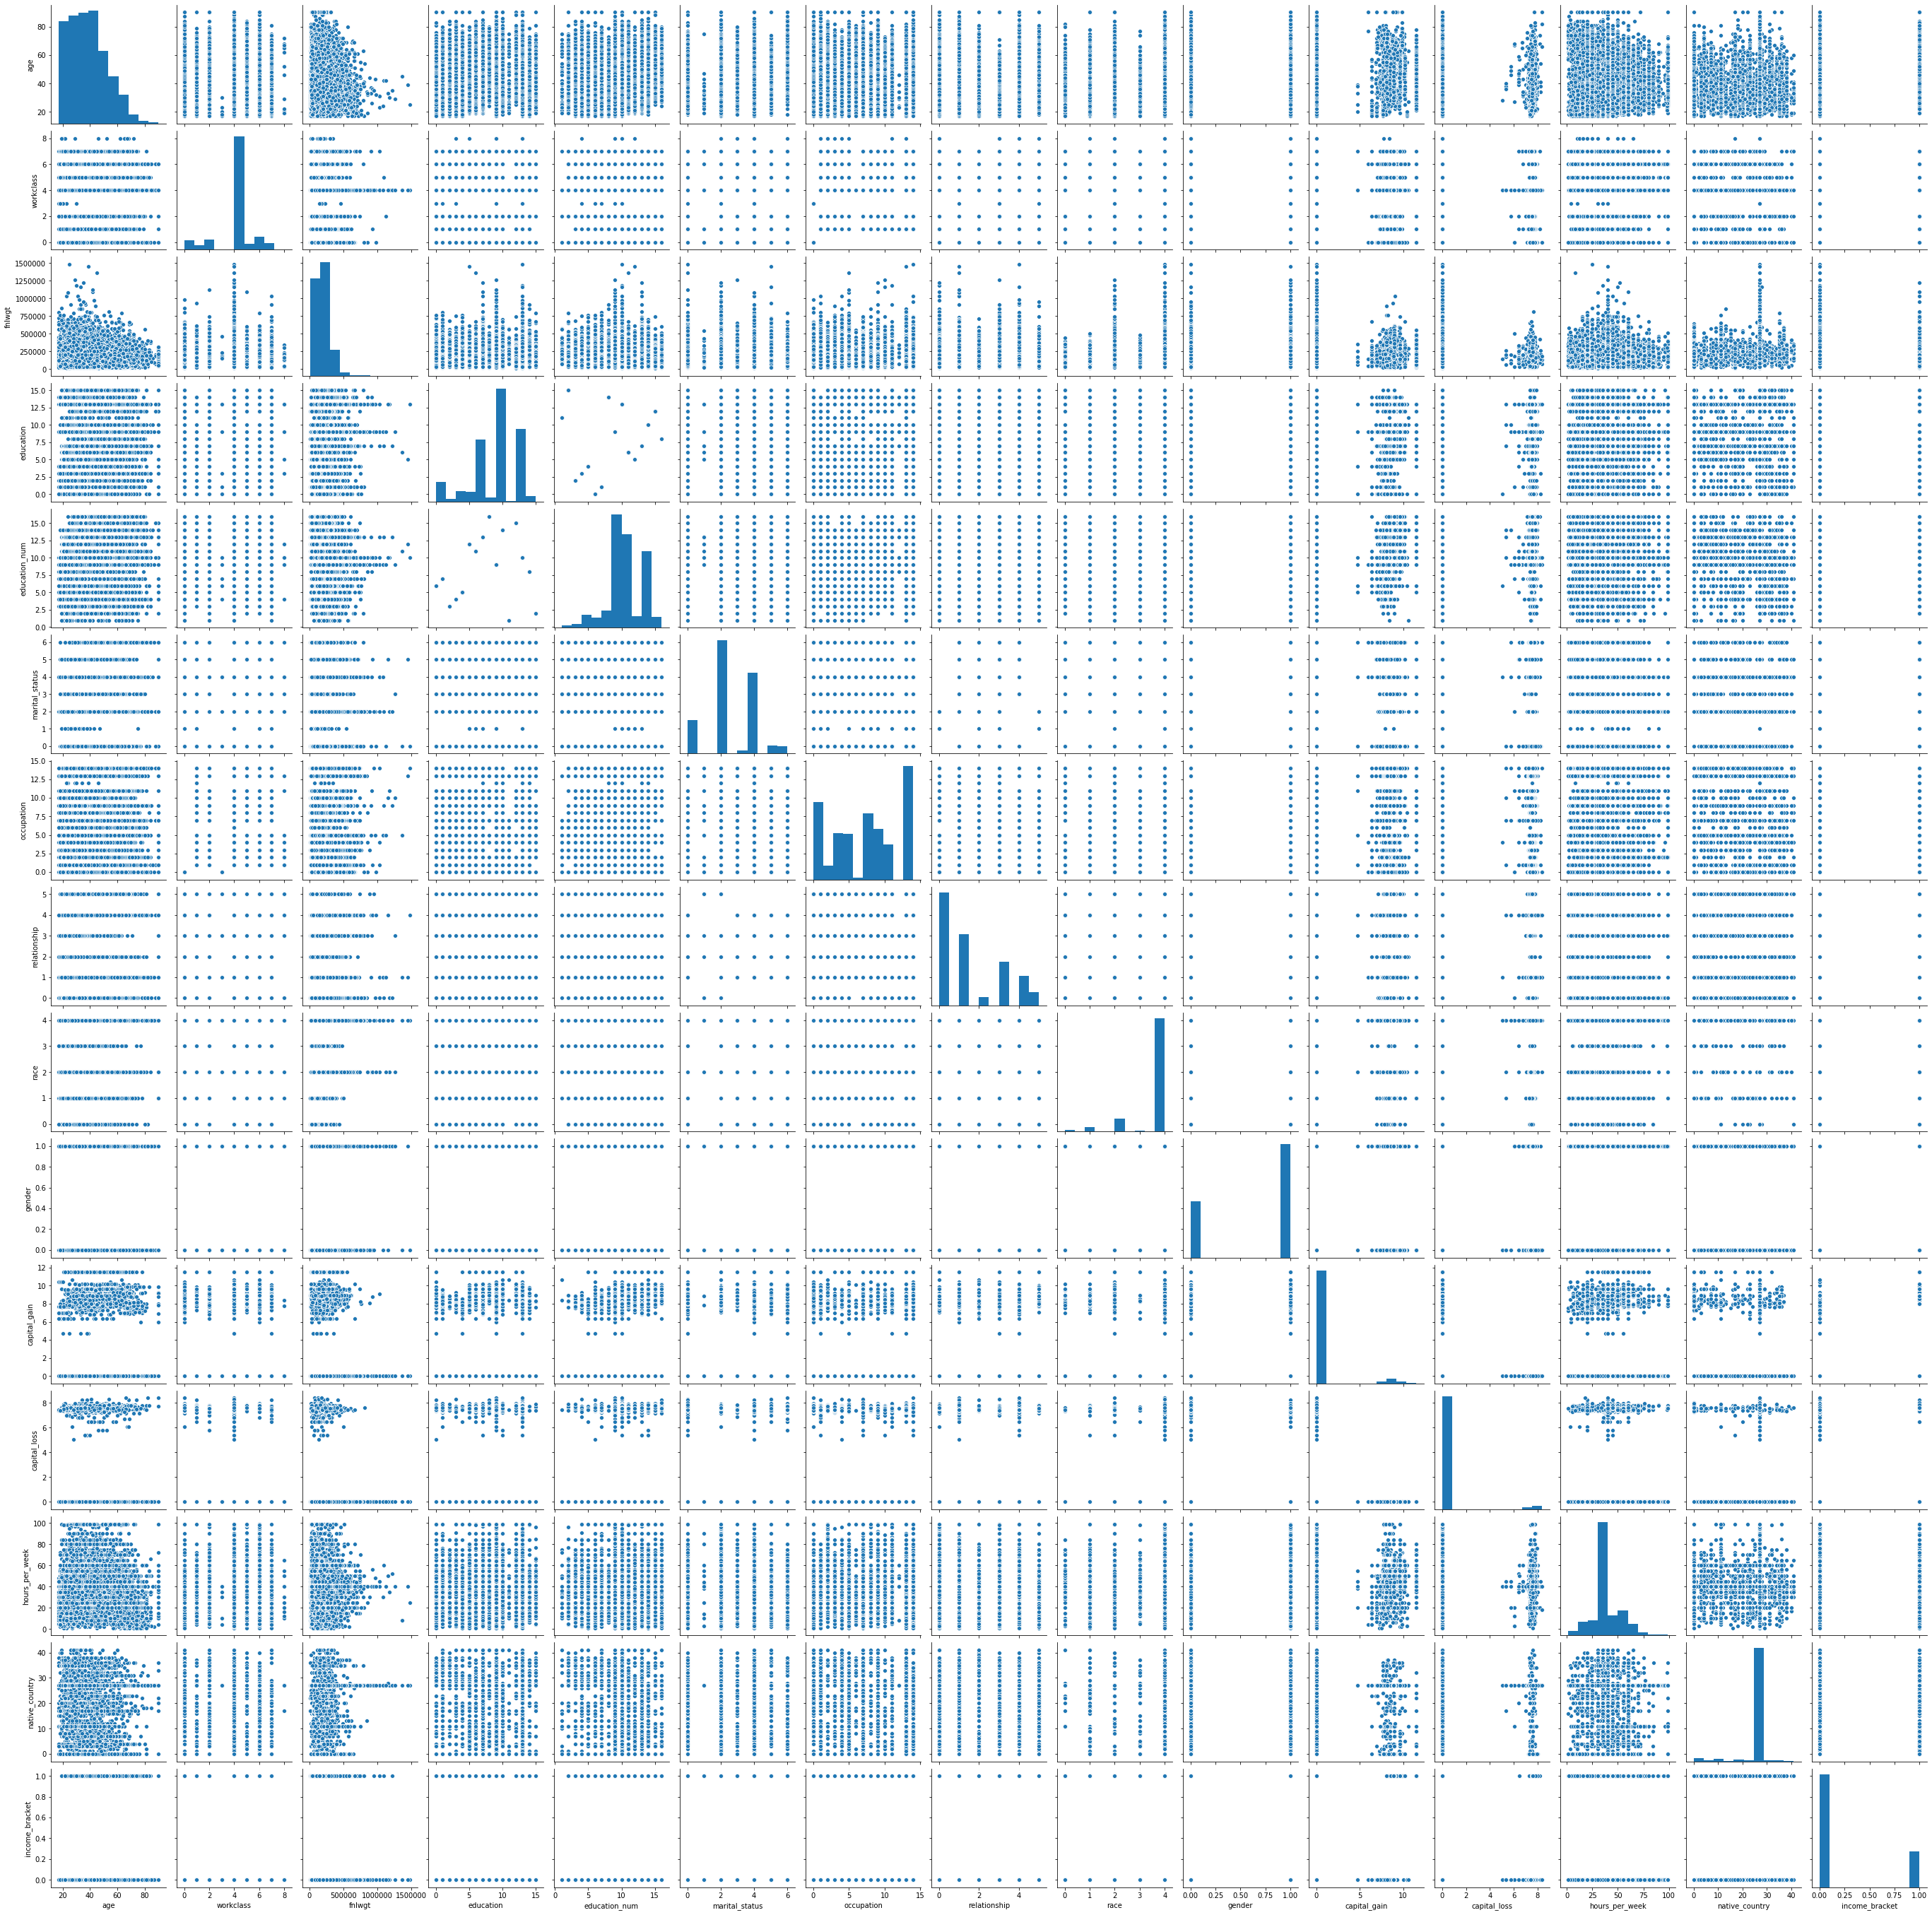

In [482]:
sns.pairplot(df)

from pairplot we come to know that skewness has been removed and the columns that will have no effect on y variable are dropped.We will recheck the effect by bivariate analysis

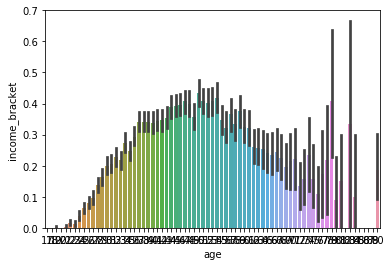

In [489]:
sns.barplot(x = 'age', y = 'income_bracket', data=df)

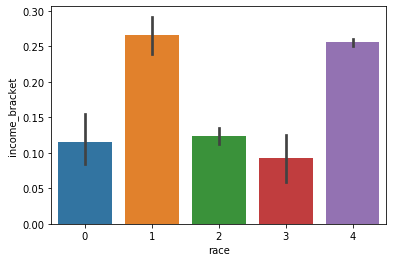

In [490]:
sns.barplot(x = 'race', y = 'income_bracket', data=df)

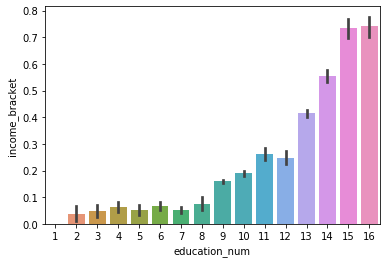

In [491]:
sns.barplot(x = 'education_num', y = 'income_bracket', data=df)

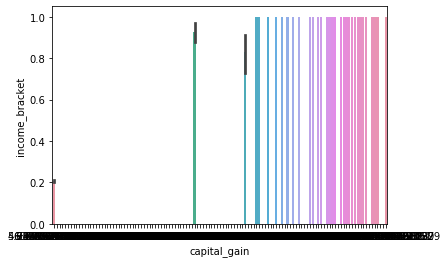

In [492]:
sns.barplot(x = 'capital_gain', y = 'income_bracket', data=df)

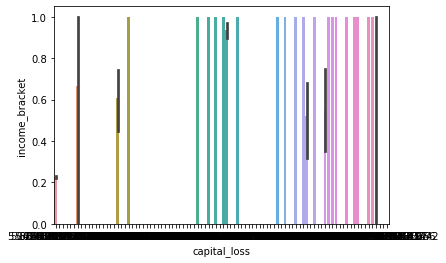

In [493]:
sns.barplot(x = 'capital_loss', y = 'income_bracket', data=df)

In [496]:
df.drop(['capital_gain','capital_loss'],axis=1,inplace=True)

In [497]:
y=df['income_bracket']

In [498]:
x=df.drop(['income_bracket'],axis=1)

In [499]:
column = ['native_country','workclass','education','marital_status','occupation','relationship','race','gender',]
le = LabelEncoder()
for i in column:
    df[i] = le.fit_transform(df[i].astype(str))

print(df.dtypes)

age               int64
workclass         int32
fnlwgt            int64
education         int32
education_num     int64
marital_status    int32
occupation        int32
relationship      int32
race              int32
gender            int32
hours_per_week    int64
native_country    int32
income_bracket    int64
dtype: object


In [500]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,income_bracket
0,39,7,77516,13,13,4,1,1,4,1,40,20,0
1,50,6,83311,13,13,2,6,0,4,1,13,20,0
2,38,4,215646,15,9,0,8,1,4,1,40,20,0
3,53,4,234721,1,7,2,8,0,2,1,40,20,0
4,28,4,338409,13,13,2,12,5,2,0,40,25,0


In [501]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state = 43)

In [502]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m, 'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.7609786057938377
[[7434    0]
 [2335    0]]
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      7434
           1       0.00      0.00      0.00      2335

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.58      0.76      0.66      9769



Accuracy score of  GaussianNB(priors=None, var_smoothing=1e-09) is:
0.8011055379260927
[[6856  578]
 [1365  970]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      7434
           1       0.63      0.42      0.50      2335

In [503]:
from sklearn.externals import joblib
#save the model 
joblib.dump(m, 'Project6.obj')

['Project6.obj']